# Online Retail Dataset

This project analyzes a real-world e-commerce dataset from Kaggle containing transactions from an online retail store. The goal is to explore customer behavior, product performance, and revenue trends using SQL and Python in Jupyter Notebook.

The workflow includes:
1. Data Ingestion and cleaning - loading the dataset into a SQLite database, removing invalid or missing records.
2. SQL analysis - aggregating sales, identifying top customers and products, and summarizing revenue by time and location.
3. Python visualization = generating clear charts to highlight trends and support business insights.

The project demonstrates the ability to combine relational database querying with Python analytics, delivering actionable insights for business decision-making.

### Load Data into the Jupyter Notebook

In [1]:
import pandas as pd
import sqlite3
import zipfile
import os

if not os.path.exists("online_retail.csv"):
    for file in os.listdir():
        if file.endswith(".zip"):
            with zipfile.ZipFile(file, 'r') as zip_ref:
                zip_ref.extractall()

df = pd.read_csv("online_retail.csv", encoding="ISO-8859-1")
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [2]:
df.tail(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541899,581587,22726,ALARM CLOCK BAKELIKE GREEN,4,2011-12-09 12:50:00,3.75,12680.0,France
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680.0,France
541901,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,2011-12-09 12:50:00,1.95,12680.0,France
541902,581587,22629,SPACEBOY LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France
541903,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,2011-12-09 12:50:00,4.15,12680.0,France
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Using df.head() and df.tail(), we previewed the first 10 rows and last 10 rows of the dataset to verify that columns like InvoiceNo, CustomerID, Quantity, and UnitPrice were correctly loaded, and to ensure that no unexpected missing or negative values were present. The df.info() method confirmed that the dataset contains 8 columns and 541,909 rows. The df.describe() method was used to analyze key numeric metrics, providing insights to inform decisions for filtering invalid transactions.

In [4]:
conn = sqlite3.connect("retail.db")
df.to_sql("sales", conn, if_exists='replace', index=False)

541909

This code creates a connection to a SQLite database called retail.db and writes the DataFrame df into a table named sales. Any existing table with that name is replaced. The output 541,909 shows the total number of rows inserted into the table, confirming that all records from the DataFrame were successfully loaded into the database. 

### Data Cleaning

In [5]:
conn.execute("""
DELETE FROM sales
WHERE CustomerID IS NULL
    OR Quantity <= 0
    OR UnitPrice <= 0;
""")

conn.commit()

Removed null customers and invalid transactions (returns and zero-price items) to ensure accurate revenue analysis.

### SQL Analysis

#### 1. Basic Metrics

In [6]:
pd.read_sql("""
SELECT
    COUNT(DISTINCT CustomerID) AS customers,
    COUNT(DISTINCT InvoiceNo) AS invoices,
    SUM(Quantity * UnitPrice) AS total_revenue
FROM sales;
""", conn)

,customers,invoices,total_revenue
0,4338,18532,8.911408e+06


This query calculates key metrics for the online retail dataset: the number of unique customers, total invoices, and overall revenue. These metrics provide a quick snapshot of the dataset's scale and business performance, giving context before deeper analysis of products, customers, countries, and time-based analysis.

#### 2. Product Analysis

In [7]:
pd.read_sql("""
SELECT
    Description,
    SUM(Quantity * UnitPrice) AS revenue
FROM sales
GROUP BY Description
ORDER BY  revenue DESC
LIMIT 10;
""", conn)

,Description,revenue
0,"PAPER CRAFT , LITTLE BIRDIE",168469.60
1,REGENCY CAKESTAND 3 TIER,142592.95
2,WHITE HANGING HEART T-LIGHT HOLDER,100448.15
3,JUMBO BAG RED RETROSPOT,85220.78
4,MEDIUM CERAMIC TOP STORAGE JAR,81416.73
5,POSTAGE,77803.96
6,PARTY BUNTING,68844.33
7,ASSORTED COLOUR BIRD ORNAMENT,56580.34
8,Manual,53779.93
9,RABBIT NIGHT LIGHT,51346.20


The top 10 products by revenue which include Paper Craft, Party Bunting, Postage, and Rabbit Night Light. These products generated between 51,346.20 and 168,469.60 in total revenue. This shows which items are the most profitable, highlighting premium or high-value products that contribute the most to the company's sales.

#### 3. Customer Analysis

In [8]:
pd.read_sql("""
SELECT
    CustomerID,
    SUM(Quantity * UnitPrice) AS total_spent
FROM sales
GROUP BY CustomerID
ORDER BY total_spent DESC
LIMIT 10;
""", conn)

,CustomerID,total_spent
0,14646.0,280206.02
1,18102.0,259657.30
2,17450.0,194550.79
3,16446.0,168472.50
4,14911.0,143825.06
5,12415.0,124914.53
6,14156.0,117379.63
7,17511.0,91062.38
8,16029.0,81024.84
9,12346.0,77183.60


This query identifies the top 10 customers by the sum of total money spent. It returns two columns: CustomerID and total_spent, which is the sum of all purchases for each customer. The top customer, CustomerID: 14646.0, spent 280,206.02 while the 10th highest customer spent 77,183.60. This analysis highlights the most valuable customers, who could be targeted for loyalty programs, personalized marketing, or retention strategies.

#### 4. Country-Level Insights

In [9]:
pd.read_sql("""
SELECT
  Country,
  SUM(Quantity * UnitPrice) AS revenue
FROM sales
GROUP BY Country
ORDER BY revenue DESC;
""", conn)

,Country,revenue
0,United Kingdom,7.308392e+06
1,Netherlands,2.854463e+05
2,EIRE,2.655459e+05
3,Germany,2.288671e+05
4,France,2.090240e+05
5,Australia,1.385213e+05
6,Spain,6.157711e+04
7,Switzerland,5.644395e+04
8,Belgium,4.119634e+04
9,Sweden,3.837833e+04


This query calculates total revenue by country. It returns two columns: Country and revenue. The country generating the most revenue is the United Kingdom with 7,308,392, followed by the Netherlands with 2,854,463.This analysis identifies key markets, helping to inform expansion decisions, marketing focus, and resource allocation across countries. 

#### 5. Time-Based Analysis

In [10]:
pd.read_sql("""
SELECT
  strftime('%Y-%m', InvoiceDate) AS month,
  SUM(Quantity * UnitPrice) AS revenue
FROM sales
GROUP BY month
ORDER BY month;
""", conn)

,month,revenue
0,2010-12,572713.890
1,2011-01,569445.040
2,2011-02,447137.350
3,2011-03,595500.760
4,2011-04,469200.361
5,2011-05,678594.560
6,2011-06,661213.690
7,2011-07,600091.011
8,2011-08,645343.900
9,2011-09,952838.382


Time-based analysis looks at how metrics change over time. It helps identify trends, seasonal patterns, and growth opportunities. For example, it can show which months have peak sales, which periods are slow, orhow revenue grows month over month. This query calculates total revenue per month. From the results, we can see that revenue peaks in November, possibly due to the Christmas holiday season and related promotions, and is lowest in December. This analysis helps the business understand seasonal trends and plan inventory, promotions, and staffing accordingly.

### Business Question & Insights

In this section, we analyze the online retail dataset to answer key business questions that can guide strategic decisions. Specifically, we focus on understanding customer behavior, product performance, and market opportunities. By combining SQL queries to aggregate and summarize data with Python visualizations to illustrate trends, we aim to identify:

- Which countries represent the best opportunities for expansion,

- Which products drive the most revenue versus high-volume sales, and

- How revenue and sales trends change over time.

The insights generated here provide actionable recommendations for marketing, inventory management, and overall business strategy.

In [11]:
metrics = pd.read_sql("""
SELECT
    COUNT(DISTINCT CustomerID) AS customers,
    COUNT(DISTINCT InvoiceNo) AS invoices,
    SUM(Quantity * UnitPrice) AS total_revenue
FROM sales;
""", conn)

metrics

,customers,invoices,total_revenue
0,4338,18532,8.911408e+06


Using SQL, we calculated three key high-level metrics: the total number of unique customers, total invoices, and overall revenue of 8,911,408. These metrics provide a snapshot of the scale of operations and the business’s overall performance. Understanding these numbers is essential before analyzing individual products, customers, or countries, as it sets context for the more detailed insights that follow.

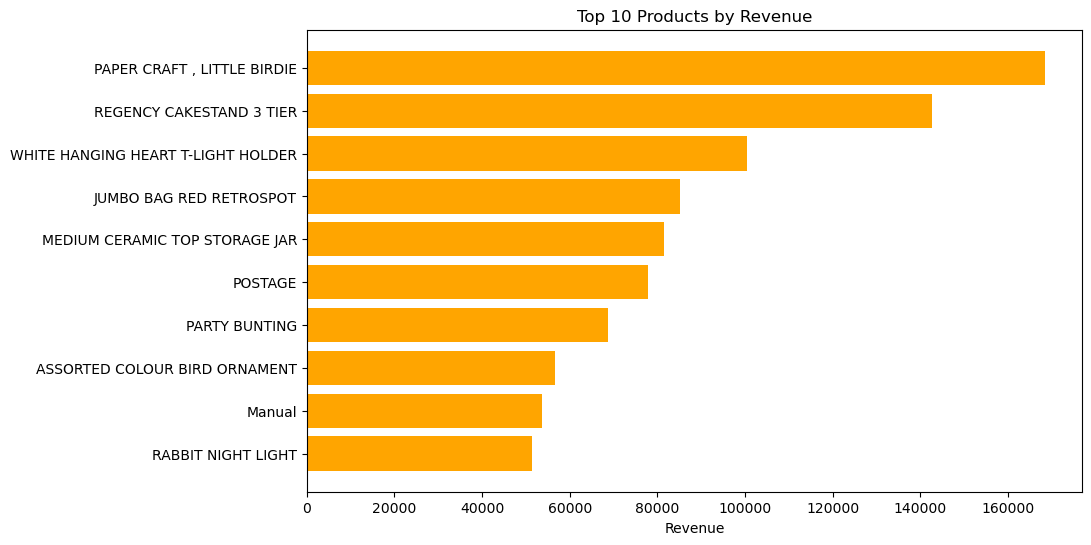

In [12]:
top_products = pd.read_sql("""
SELECT
    Description,
    SUM(Quantity * UnitPrice) AS revenue
FROM sales
GROUP BY Description
ORDER BY revenue DESC
LIMIT 10;
""", conn)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.barh(top_products['Description'], top_products['revenue'], color='orange')
plt.gca().invert_yaxis()  # Largest revenue on top
plt.xlabel("Revenue")
plt.title("Top 10 Products by Revenue")
plt.show()


By aggregating total revenue per product, we identified the top 10 products contributing most to revenue. These products highlighting premium or high-value items that are most profitable for the business. Conversely, products with high quantity sold but lower revenue represent fast-moving, volume-based items that are ideal for promotions or bundling. These insights can guide pricing, inventory allocation, and marketing strategies to maximize profitability.

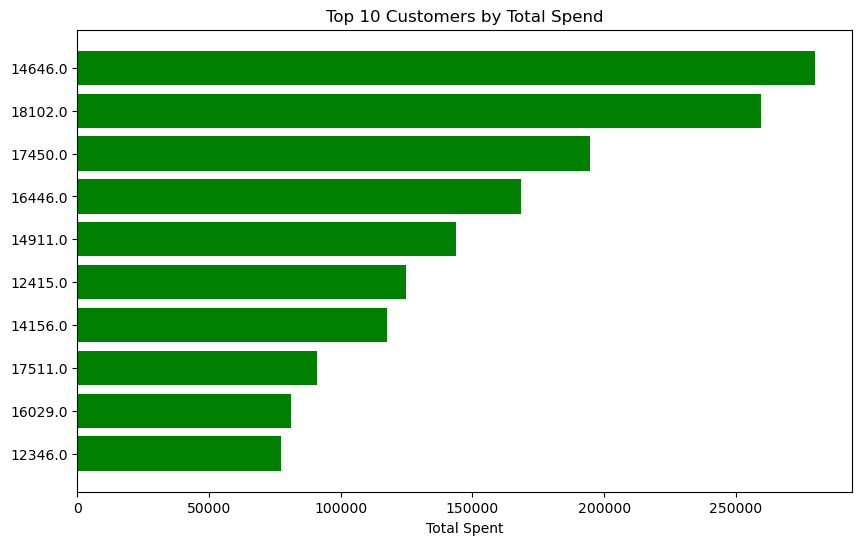

In [13]:
top_customers = pd.read_sql("""
SELECT
    CustomerID,
    SUM(Quantity * UnitPrice) AS total_spent
FROM sales
GROUP BY CustomerID
ORDER BY total_spent DESC
LIMIT 10;
""", conn)

plt.figure(figsize=(10,6))
plt.barh(top_customers['CustomerID'].astype(str), top_customers['total_spent'], color='green')
plt.gca().invert_yaxis()
plt.xlabel("Total Spent")
plt.title("Top 10 Customers by Total Spend")
plt.show()


Examining total spend per customer revealed the top 10 customers by total purchase value. Identifying these high-value customers helps the business target loyalty programs, personalized marketing campaigns, and retention strategies. Additionally, understanding the distribution of customer spend highlights opportunities to increase engagement with mid-tier or less active customers.

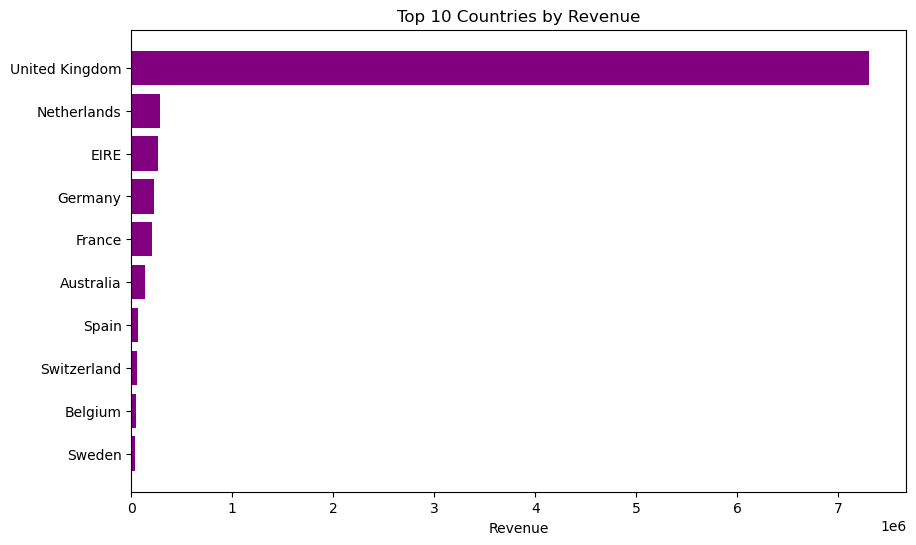

In [14]:
country_revenue = pd.read_sql("""
SELECT
  Country,
  SUM(Quantity * UnitPrice) AS revenue
FROM sales
GROUP BY Country
ORDER BY revenue DESC
LIMIT 10;
""", conn)

plt.figure(figsize=(10,6))
plt.barh(country_revenue['Country'], country_revenue['revenue'], color='purple')
plt.gca().invert_yaxis()
plt.xlabel("Revenue")
plt.title("Top 10 Countries by Revenue")
plt.show()


Aggregating revenue by country showed which markets contribute the most to overall sales. The top country, the United Kingdom had a significantly higher revenue than the second place country, the Netherlands. Countries with high revenue but fewer orders may indicate premium markets, while those with high order volume but lower revenue might benefit from pricing adjustments or marketing initiatives. These insights are valuable for expansion planning, resource allocation, and international marketing strategies.

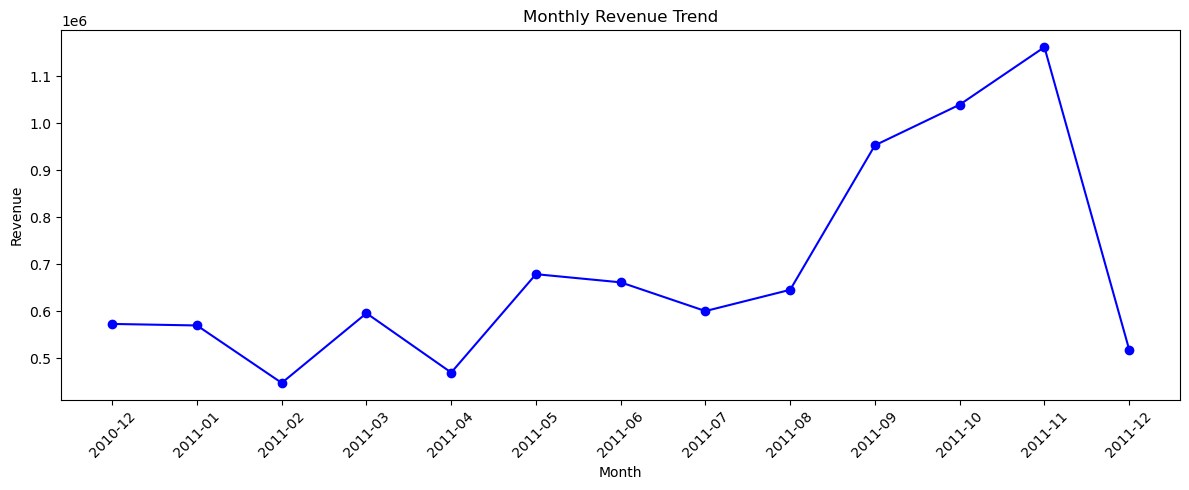

In [15]:
monthly_revenue = pd.read_sql("""
SELECT
  strftime('%Y-%m', InvoiceDate) AS month,
  SUM(Quantity * UnitPrice) AS revenue
FROM sales
GROUP BY month
ORDER BY month;
""", conn)

plt.figure(figsize=(12,5))
plt.plot(monthly_revenue['month'], monthly_revenue['revenue'], marker='o', color='blue')
plt.xticks(rotation=45)
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()


Aggregating monthly revenue revealed seasonal trends and peak sales periods, such as [peak month(s)], likely influenced by [holidays, promotions, or seasonal demand]. Conversely, slower months like [low month(s)] indicate periods where marketing campaigns or inventory adjustments could help boost sales. Understanding these patterns supports forecasting, staffing, and inventory planning.

Revenue appears to begin growing the further into the year, sharply building in August, consistently from September to November, and drops sharply in December. Most likely due to the holiday shopping season in the United Kingdom, and Europe. 

Based on the analyses above, the business can:

- Target high-revenue, low-order countries for expansion campaigns.

- Focus marketing and promotions on premium and fast-moving products appropriately.

- Develop loyalty programs and retention strategies for high-value customers.

- Adjust inventory and staffing according to seasonal revenue trends.

- Use insights from product and country analysis to inform pricing, bundling, and promotional strategies.

These insights combine SQL aggregation and Python visualization to translate raw transactional data into actionable business decisions, demonstrating the full analytics workflow from data ingestion to strategic recommendations.

### Final Takeaways

This analysis demonstrates how SQL and Python can be combined to extract actionable insights from a large retail dataset. Key findings include identifying high-value products and customers, recognizing top-performing countries, and uncovering seasonal revenue trends. These insights can guide marketing, expansion, inventory, and pricing strategies, showing how data can directly inform business decisions. The project also highlights the importance of data cleaning, aggregation, and visualization in producing reliable, interpretable results. Overall, this workflow showcases end-to-end data analytics skills, from raw data to strategic recommendations.

### References

Dataset: Online Retail Dataset from Kaggle
https://www.kaggle.com/datasets/ulrikthygepedersen/online-retail-dataset

Analysis Tools: Python (pandas, matplotlib), SQL (SQLite)

Methods & Approach: All analysis, data cleaning and visualization techniques were developed using personal knowledge, SQL, and Python.